# Modeling Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from wrangle_zillow import min_max_scaler
from wrangle_zillow import split_my_data
from wrangle_zillow import split_stratify_my_data
from wrangle_mall import acquire_cache_mall
np.random.seed(123)

### Clustering with the Iris Dataset

### Q1.
- Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
train, validate, test = split_my_data(iris)
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
110,0.611111,0.500000,0.694915,0.791667
56,0.555556,0.541667,0.627119,0.625000
19,0.222222,0.750000,0.084746,0.083333
69,0.361111,0.208333,0.491525,0.416667
109,0.805556,0.666667,0.864407,1.000000


- Choose features other than the ones used in the lesson.

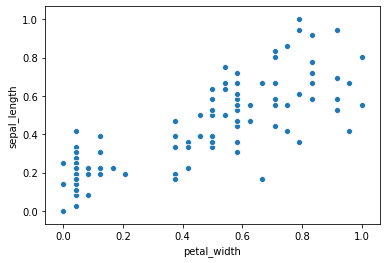

In [4]:
sns.scatterplot(data=train_scaled, x='petal_width', y='sepal_length')
plt.show()

In [5]:
X = train_scaled[['petal_width', 'sepal_length']]

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1],
      dtype=int32)

In [7]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_scaled

,petal_width,sepal_length
0,0.534188,0.440171
1,0.072917,0.203472
2,0.794540,0.698276


In [8]:
train['cluster'] = kmeans.predict(X)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
110,6.5,3.2,5.1,2.0,virginica,2
56,6.3,3.3,4.7,1.6,versicolor,0
19,5.1,3.8,1.5,0.3,setosa,1
69,5.6,2.5,3.9,1.1,versicolor,0
109,7.2,3.6,6.1,2.5,virginica,2


In [9]:
centroids = train.groupby('cluster')['petal_width', 'sepal_length'].mean()
centroids

,petal_width,sepal_length
cluster,,
0,1.382051,5.884615
1,0.275000,5.032500
2,2.006897,6.813793


- Visualize the results of your clustering.

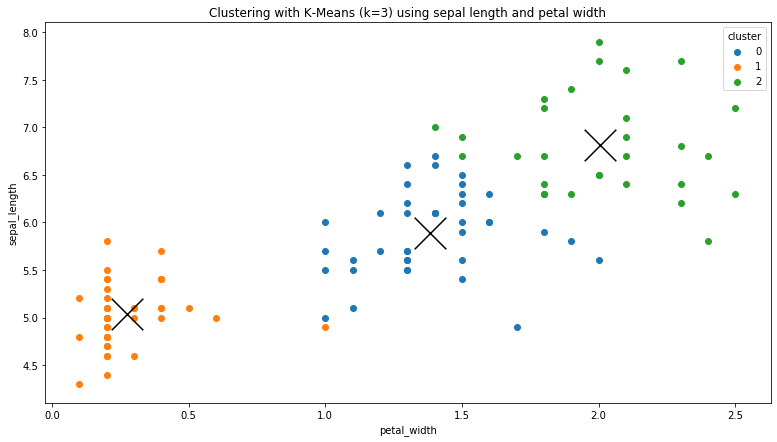

In [10]:
fig, ax = plt.subplots(figsize=(13,7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel = 'petal_width', title='Clustering with K-Means (k=3) using sepal length and petal width')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_width', marker='x', s=1000, ax=ax, c='black')

- Use the elbow method to visually select a good value for k.

In [11]:
# sum of squared distances from each point to its cluster center
kmeans.inertia_

2.4269196998722857

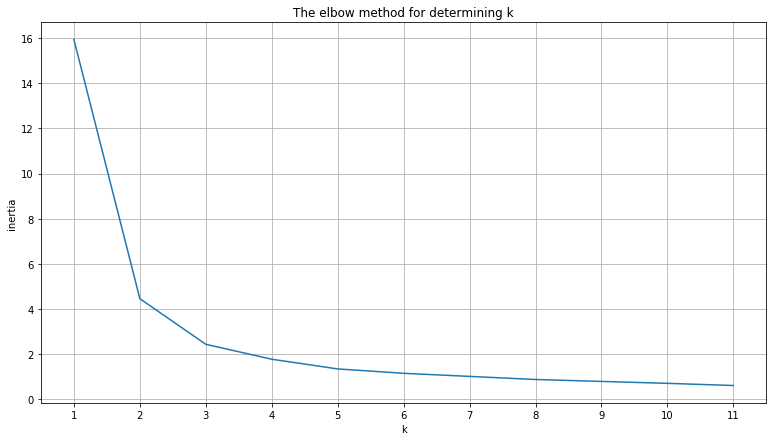

In [12]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

- Repeat the clustering, this time with 3 different features.

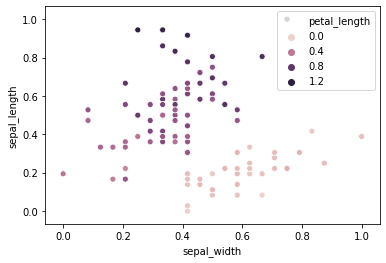

In [13]:
sns.scatterplot(data=train_scaled, x='sepal_width', y='sepal_length', hue='petal_length')
plt.show()

In [14]:
X = train_scaled[['sepal_width', 'petal_width', 'sepal_length']]

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 3, 1, 0, 2, 1, 3, 0, 0, 1, 1, 1, 1, 3, 1, 3, 0, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 0, 0, 2, 2, 3, 3, 1, 3, 3, 2, 0, 3, 0, 2, 2, 3, 1,
       1, 1, 3, 1, 1, 3, 2, 1, 2, 1, 3, 1, 1, 1, 2, 2, 3, 2, 3, 0, 1, 1,
       2, 3, 2, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3,
       0, 1, 3, 2, 0, 1, 3, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 1, 0, 1],
      dtype=int32)

In [16]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_scaled

,sepal_width,petal_width,sepal_length
0,0.166667,0.451923,0.322650
1,0.614316,0.065171,0.204416
2,0.460417,0.854167,0.726389
3,0.384259,0.591435,0.523920


In [17]:
train['cluster'] = kmeans.predict(X)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
110,6.5,3.2,5.1,2.0,virginica,2
56,6.3,3.3,4.7,1.6,versicolor,3
19,5.1,3.8,1.5,0.3,setosa,1
69,5.6,2.5,3.9,1.1,versicolor,0
109,7.2,3.6,6.1,2.5,virginica,2


In [18]:
ctab = pd.crosstab(train.species, train.cluster)
ctab

cluster,0,1,2,3
species,,,,
setosa,0,39,0,0
versicolor,12,0,0,26
virginica,1,0,20,10


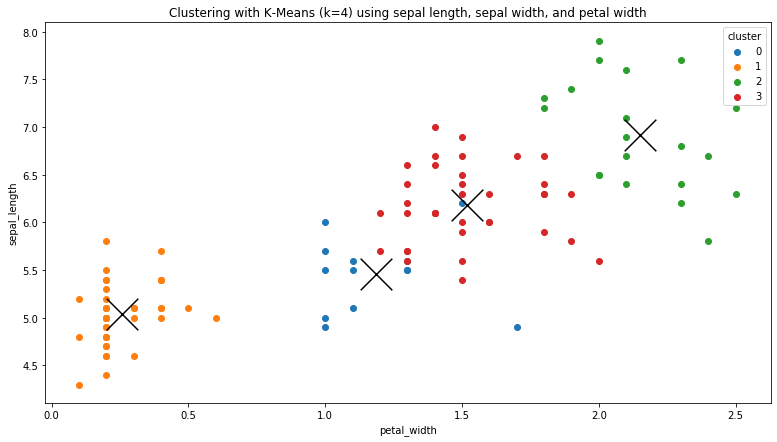

In [19]:
fig, ax = plt.subplots(figsize=(13,7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel = 'petal_width', title='Clustering with K-Means (k=4) using sepal length, sepal width, and petal width')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_width', marker='x', s=1000, ax=ax, c='black')

### Q2.
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [37]:
mall = acquire_cache_mall()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
mall_dummies = pd.get_dummies(mall.gender, drop_first=True).rename(columns={'Male':'is_male'})
mall_dummies

,is_male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [40]:
mall = pd.concat((mall, mall_dummies), axis=1)
mall.drop(columns=['gender'], inplace=True)
mall['customer_id'] = mall['customer_id'].astype(object)
mall.head()

,customer_id,age,annual_income,spending_score,is_male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [41]:
train, validate, test = split_my_data(mall)
train.head()

,customer_id,age,annual_income,spending_score,is_male
3,4,23,16,77,0
163,164,31,81,93,0
144,145,25,77,12,1
169,170,32,87,63,1
164,165,50,85,26,1


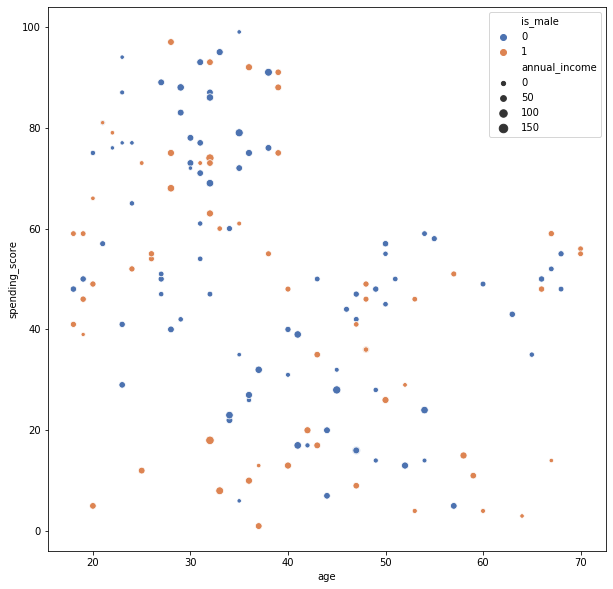

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=train, x='age', y='spending_score', hue='is_male', size='annual_income', palette='deep')
plt.show()

In [43]:
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)
train_scaled.head()

,age,annual_income,spending_score,is_male
3,0.096154,0.008197,0.775510,0.0
163,0.250000,0.540984,0.938776,0.0
144,0.134615,0.508197,0.112245,1.0
169,0.269231,0.590164,0.632653,1.0
164,0.615385,0.573770,0.255102,1.0


In [44]:
X = train_scaled
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans.predict(X)

array([2, 2, 3, 1, 3, 3, 3, 3, 0, 3, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1,
       0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 3, 1, 3, 1, 3, 1, 0, 0, 0, 1, 2, 2,
       3, 1, 3, 2, 1, 0, 2, 2, 3, 2, 2, 0, 2, 3, 2, 2, 3, 0, 0, 3, 0, 1,
       2, 1, 0, 1, 3, 2, 1, 2, 1, 2, 0, 3, 2, 0, 1, 1, 1, 2, 1, 2, 3, 3,
       1, 0, 0, 1, 3, 3, 3, 0, 2, 2, 3, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 1, 0, 2, 2, 3, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 2, 1, 3, 0, 0,
       3, 3, 2, 2, 3, 0, 1, 2, 2, 1, 3, 2], dtype=int32)

In [45]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_scaled

,age,annual_income,spending_score,is_male
0,0.586538,0.379391,0.334548,1.110223e-16
1,0.188874,0.354508,0.678936,1.000000e+00
2,0.200092,0.375098,0.706511,1.110223e-16
3,0.591346,0.387551,0.257015,1.000000e+00


In [46]:
train['cluster'] = kmeans.predict(X)
train.head()

,customer_id,age,annual_income,spending_score,is_male,cluster
3,4,23,16,77,0,2
163,164,31,81,93,0,2
144,145,25,77,12,1,3
169,170,32,87,63,1,1
164,165,50,85,26,1,3


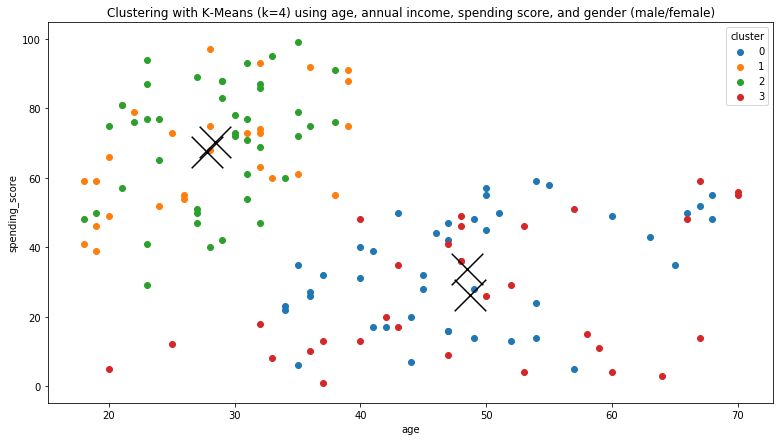

In [47]:
fig, ax = plt.subplots(figsize=(13,7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.age, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='spending_score', xlabel = 'age', title='Clustering with K-Means (k=4) using age, annual income, spending score, and gender (male/female)')

train.groupby('cluster').mean().plot.scatter(y='spending_score', x='age', marker='x', s=1000, ax=ax, c='black')

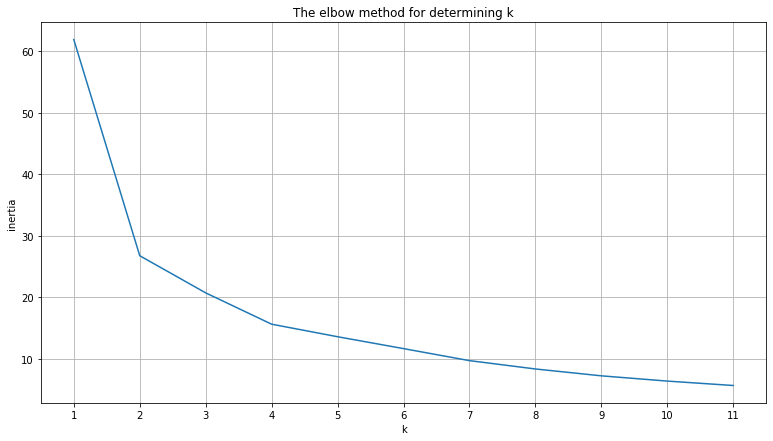

In [48]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [53]:
train.groupby('cluster').mean()

,age,annual_income,spending_score,is_male
cluster,,,,
0,48.500000,61.285714,33.785714,0
1,27.821429,58.250000,67.535714,1
2,28.404762,60.761905,70.238095,0
3,48.750000,62.281250,26.187500,1


### Q3.
How does scaling impact the results of clustering?


Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [54]:
mall = acquire_cache_mall()
mall_dummies = pd.get_dummies(mall.gender, drop_first=True).rename(columns={'Male':'is_male'})
mall = pd.concat((mall, mall_dummies), axis=1)
mall.drop(columns=['gender'], inplace=True)
mall['customer_id'] = mall['customer_id'].astype(object)
train, validate, test = split_my_data(mall)
train.head()

,customer_id,age,annual_income,spending_score,is_male
3,4,23,16,77,0
163,164,31,81,93,0
144,145,25,77,12,1
169,170,32,87,63,1
164,165,50,85,26,1


In [ ]:
train.drop(columns=['customer_id'], inplace=True)

In [57]:
train.columns

Index(['age', 'annual_income', 'spending_score', 'is_male'], dtype='object')

In [58]:
X = train
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans.predict(X)

array([3, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 3, 3, 3, 3, 1, 3, 2, 2, 2,
       1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 3, 1, 3, 0, 1, 0, 2, 3, 2,
       1, 3, 1, 3, 2, 0, 2, 2, 0, 2, 3, 0, 3, 1, 2, 0, 0, 1, 0, 0, 0, 3,
       3, 3, 1, 2, 1, 3, 3, 2, 3, 2, 0, 0, 3, 1, 2, 3, 3, 3, 2, 3, 1, 0,
       2, 1, 1, 3, 1, 0, 1, 1, 2, 3, 0, 3, 3, 2, 1, 3, 1, 2, 1, 1, 0, 3,
       1, 3, 2, 1, 2, 3, 1, 1, 1, 1, 0, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1,
       0, 1, 2, 2, 0, 0, 3, 2, 2, 3, 1, 3], dtype=int32)

In [59]:
train['cluster'] = kmeans.predict(X)
train.head()

,age,annual_income,spending_score,is_male,cluster
3,23,16,77,0,3
163,31,81,93,0,2
144,25,77,12,1,0
169,32,87,63,1,2
164,50,85,26,1,0


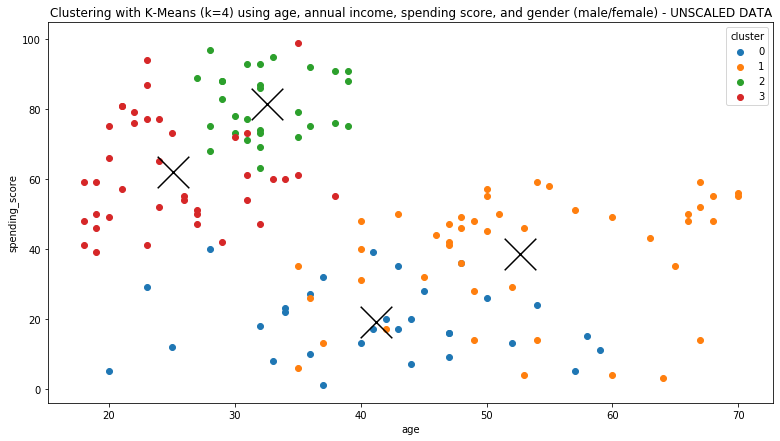

In [60]:
fig, ax = plt.subplots(figsize=(13,7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.age, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='spending_score', xlabel = 'age', title='Clustering with K-Means (k=4) using age, annual income, spending score, and gender (male/female) - UNSCALED DATA')

train.groupby('cluster').mean().plot.scatter(y='spending_score', x='age', marker='x', s=1000, ax=ax, c='black')

In [61]:
train.groupby('cluster').mean()

,age,annual_income,spending_score,is_male
cluster,,,,
0,41.193548,88.096774,19.161290,0.483871
1,52.688889,44.044444,38.488889,0.377778
2,32.517241,85.172414,81.344828,0.379310
3,25.076923,40.179487,61.871795,0.435897


In [62]:
train.describe()

,age,annual_income,spending_score,is_male,cluster
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,38.673611,60.763889,49.291667,0.416667,1.527778
std,13.633992,27.115651,25.966594,0.494727,1.109050
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.750000,40.000000,28.750000,0.000000,1.000000
50%,36.000000,60.500000,49.500000,0.000000,1.000000
75%,48.000000,78.000000,72.250000,1.000000,3.000000
max,70.000000,137.000000,99.000000,1.000000,3.000000


In [63]:
# Because this data is unscaled, the influence of gender is effectively smothered by the influence of the other larger categories (especially annual income, as it has the largest range of values)